# Construction of Building Typologies from a Regional Material Catalog:
## Assessment of Urban Heat Demand and the Environmental Impact of Retrofit Policies.

# (f) Energy Payback

**Supplementary material to the paper with the same title**

[M. Esteban Munoz H.](emunozh@gmail.com)

Fri Aug 07, 2015

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pylab as plt
import matplotlib
pd.options.display.mpl_style = 'default'
%matplotlib inline

In [1]:
from scripts.HeatDemand import retrofits

In [3]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}
matplotlib.rc('font', **font)

# load Data

In [9]:
H = pd.read_csv("buildings_heat.csv", index_col="UUID",
                             usecols=["UUID", "Baublock", "heat", "sqm", "bja", "shell", "aog"])

In [ ]:
for i in range(1, 7): retrofits(i)

In [19]:
for i in range(1, 7):
    buildings_heat_temp = pd.read_csv("buildings_heat_retrofit{}.csv".format(i), index_col="UUID")
    buildings_heat_temp = buildings_heat_temp[["heat.1"]]
    buildings_heat_temp.columns = ["heat_r{}".format(i)]
    H = H.join(buildings_heat_temp, how='outer')

In [20]:
buildings_ge = pd.read_csv("buildings_genergy.csv", index_col="UUID")

In [23]:
buildings_ge = buildings_ge[["Steinwolle_12cm", "Steinwolle_24cm", "XPS_12cm", "XPS_24cm", "EPS_12cm", "EPS_24cm"]]

In [24]:
H = H.join(buildings_ge, how='outer')

In [25]:
H_retro = H[-np.isnan(H.heat_r1)]

In [26]:
H_retro.head()

,Baublock,aog,bja,shell,sqm,heat,heat_r1,heat_r2,heat_r3,heat_r4,heat_r5,heat_r6,Steinwolle_12cm,Steinwolle_24cm,XPS_12cm,XPS_24cm,EPS_12cm,EPS_24cm
UUID,,,,,,,,,,,,,,,,,,
DEHHALKAJ0000nc4,137033,4,1964,545.142646,290.401459,37485.160573,14659.417247,12605.177479,13058.504515,11621.580626,13898.177873,12126.949428,33127.359169,66254.718337,255316.729810,510633.459619,25521.180075,51042.360151
DEHHALKAJ0000nfM,137035,4,1973,4009.510054,731.524685,41233.374597,23706.297331,21459.492237,22009.704255,20137.148531,22943.676675,20839.916672,243650.869270,487301.738541,1877847.939541,3755695.879081,187707.618905,375415.237809
DEHHALKAJ0000nmB,137031,4,1962,913.753561,562.908452,49867.032047,21694.104186,18581.802448,19272.126125,17076.648316,20545.430943,17851.272106,55527.195687,111054.391373,427955.091319,855910.182639,42777.921203,85555.842407
DEHHALKAJ0000np1,137046,4,1969,1014.139429,595.123816,35983.257041,22392.235254,19893.219138,20478.978791,18546.276850,21511.086747,19251.879704,61627.468222,123254.936444,474970.660135,949941.320269,47477.545858,94955.091715
DEHHALKAJ0000nsL,137033,4,1972,980.658541,551.688254,32637.662356,21583.945368,18708.905944,19351.511742,17292.788225,20528.642594,18024.502330,59592.893548,119185.787097,459289.936852,918579.873704,45910.117970,91820.235939


# Plots Energy Payback

/usr/lib/python3.4/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


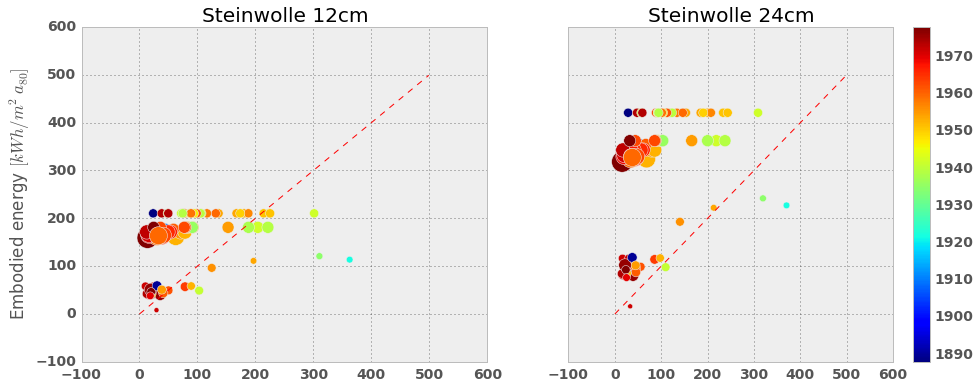

In [95]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True, sharex=True)

sc1 = ax1.scatter((H_retro.heat - H_retro.heat_r1) / H_retro.sqm,
            H_retro.Steinwolle_12cm / H_retro.sqm / 2,
            s=H_retro.shell / H_retro.sqm * H_retro.aog * 12,
            c=H_retro.bja.tolist())#, alpha=0.5)
ax1.set_ylabel(r"Embodied energy $[kWh/m^2 a_{80}]$")
x = [a for a in range(500)]
ax1.plot(x, x, "r--")
ax1.set_title("Steinwolle 12cm")

sc2 = ax2.scatter((H_retro.heat - H_retro.heat_r2) / H_retro.sqm,
            H_retro.Steinwolle_24cm / H_retro.sqm / 2,
            s=H_retro.shell / H_retro.sqm * H_retro.aog * 12,
            c=H_retro.bja.tolist())#, alpha=0.5)
ax2.plot(x, x, "r--")
ax2.set_title("Steinwolle 24cm")

fig.colorbar(sc1)
#fig.savefig("FIGURES/payback01.png", bbox_inches="tight");

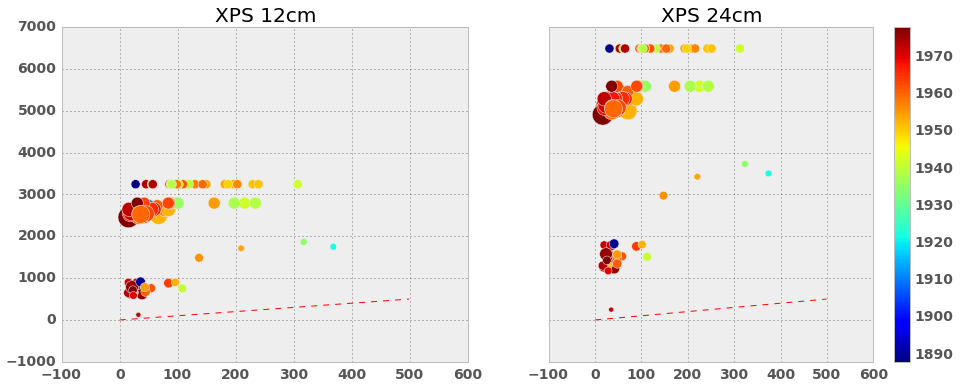

In [94]:
fig, (ax3, ax4) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True, sharex=True)

sc3 = ax3.scatter((H_retro.heat - H_retro.heat_r3) / H_retro.sqm,
            H_retro.XPS_12cm / H_retro.sqm,
            s=H_retro.shell / H_retro.sqm * H_retro.aog * 12,
            c=H_retro.bja.tolist())#, alpha=0.5)
ax3.set_title("XPS 12cm")
x = [a for a in range(500)]
ax3.plot(x, x, "r--")

sc4 = ax4.scatter((H_retro.heat - H_retro.heat_r4) / H_retro.sqm,
            H_retro.XPS_24cm / H_retro.sqm,
            s=H_retro.shell / H_retro.sqm * H_retro.aog * 12,
            c=H_retro.bja.tolist())#, alpha=0.5)
ax4.set_title("XPS 24cm")
ax4.plot(x, x, "r--")

fig.colorbar(sc3)
#fig.savefig("FIGURES/payback02.png", bbox_inches="tight");

/usr/lib/python3.4/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


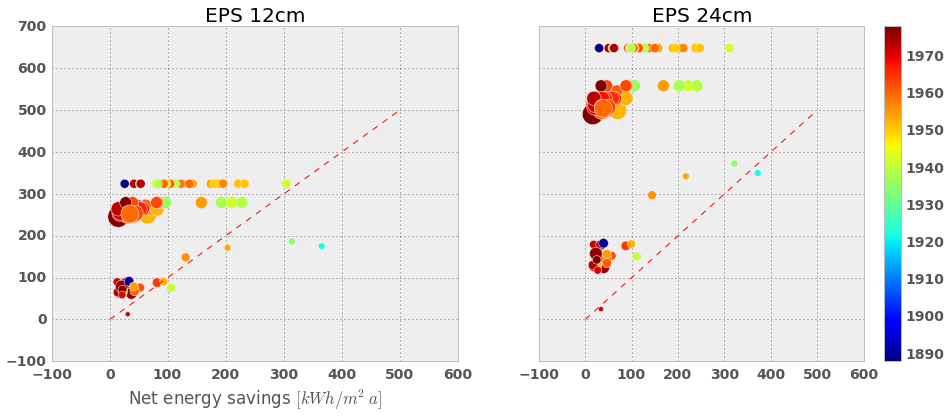

In [97]:
fig, (ax5, ax6) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True, sharex=True)

sc5 = ax5.scatter((H_retro.heat - H_retro.heat_r5) / H_retro.sqm,
            H_retro.EPS_12cm / H_retro.sqm,
            s=H_retro.shell / H_retro.sqm * H_retro.aog * 12,
            c=H_retro.bja.tolist())#, alpha=0.5)
ax5.set_xlabel(r"Net energy savings $[kWh/m^2 a]$")
ax5.set_title("EPS 12cm")
x = [a for a in range(500)]
ax5.plot(x, x, "r--")

sc6 = ax6.scatter((H_retro.heat - H_retro.heat_r6) / H_retro.sqm,
            H_retro.EPS_24cm / H_retro.sqm,
            s=H_retro.shell / H_retro.sqm * H_retro.aog * 12,
            c=H_retro.bja.tolist())#, alpha=0.5)
ax6.set_title("EPS 24cm")
ax6.plot(x, x, "r--")

fig.colorbar(sc5)
#fig.savefig("FIGURES/payback03.png", bbox_inches="tight");

# Plots Energy Payback II

In [27]:
materials = H_retro.columns[12:]

In [31]:
def sumRetrofits(material, i):
    T_ret_2 = pd.DataFrame(index=["Net energy savings - {}".format(material), material])
    H_retro_temp = H_retro.copy()
    H_retro_temp["Net energy savings - {}".format(material)] = (H_retro_temp["heat"] - H_retro_temp["heat_r{}".format(i)])
    H_retro_temp = H_retro_temp.sort("Net energy savings - {}".format(material), ascending=False)
    for retrofit in range(1,11):
        inx = int(H_retro_temp.shape[0]*retrofit/10)
        T_ret = H_retro_temp[["Net energy savings - {}".format(material), material]][:inx].sum()
        T_ret = pd.DataFrame(T_ret, columns=["{}%".format(retrofit)])
        T_ret_2 = T_ret_2.join(T_ret, how='outer')
    return(T_ret_2)

In [33]:
Retrofits = False
for e, material in enumerate(materials):
    if isinstance(Retrofits, bool):
        Retrofits = sumRetrofits(material, e+1)
    else:
        Retrofits = Retrofits.append(sumRetrofits(material, e+1))
    print("got: ", e+1, material)

got:  1 Steinwolle_12cm
got:  2 Steinwolle_24cm
got:  3 XPS_12cm
got:  4 XPS_24cm
got:  5 EPS_12cm
got:  6 EPS_24cm


In [34]:
A = [a for a in Retrofits.index.tolist() if "Net energy savings" in a and "XPS" not in a]
B = [a for a in Retrofits.index.tolist() if "Net energy savings" not in a and "XPS" not in a]

/usr/lib/python3.4/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


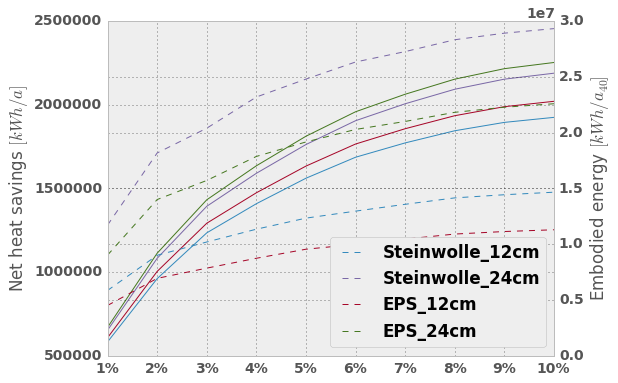

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))
Retrofits.loc[A].T.plot(ax=ax, legend=False)
ax.set_ylabel(r"Net heat savings $[kWh/a]$")
ax_c = ax.twinx()
Retrofits.loc[B].T.plot(ax=ax_c, style='--')#, legend=False)
ax_c.set_ylabel(r"Embodied energy $[kWh/a_{40}]$")
#fig.savefig("FIGURES/retrofits.png", bbox_inches="tight");